#### 基本ライブラリのインポート

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### データのインポートと前処理

ここでは、Boston近郊の住宅地データについて、目的変数(どれだけ住みやすいかのスコア?)の予測を行う。

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]
raw_df
# raw_df.iat[1,1]

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


本来なら1行の中に入るはずが折り返されてしまっているデータが存在するので、それらを11,12,13列目に格納する。

In [4]:
#新たなrawを作る
raw_df[11] = 0
raw_df[12] = 0
raw_df[13] = 0
for j in range(3):
  for i in range(1011):
    raw_df.iat[i, 11+j] = raw_df.iat[i+1, j]
raw_df2 = raw_df.dropna()
df = raw_df2.rename(columns = {0:'CRIM',1:'ZN',2:'INDUS',3:'CHAS',4:'NOX',5:'RM',6:'AGE',7:'DIS',8:'RAD',9:'TAX',10:'PTRATIO',11:'B',12:'LSTAT',13:'Target'}, index=lambda s: int(s/2))
df
t = df['Target'].values
x = df.drop(labels=['Target'], axis=1).values

In [5]:
from sklearn.model_selection import train_test_split
# 30％をテストデータに分割
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.3, random_state=424)

### 1 線形回帰

#### 1.1 重回帰分析

In [6]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [7]:
model.fit(x_train, t_train)

LinearRegression()

In [8]:
model.coef_

array([-1.31725553e-01,  3.74132316e-02,  4.59505980e-02,  1.06859817e+00,
       -1.55035257e+01,  3.82196396e+00, -5.28719565e-03, -1.41666852e+00,
        3.60711002e-01, -1.65685471e-02, -1.01087914e+00,  8.58652380e-03,
       -5.31148060e-01])

<BarContainer object of 13 artists>

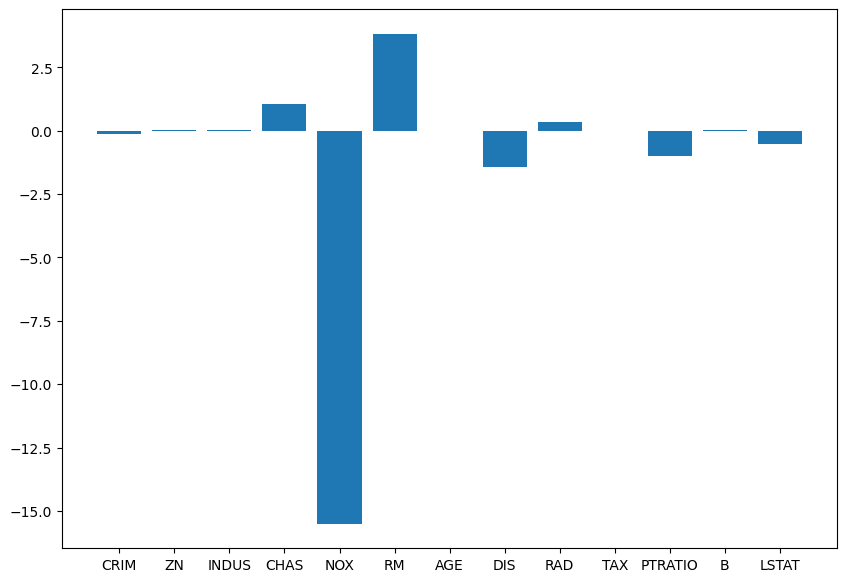

In [9]:
plt.figure(figsize=(10,7))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])
plt.bar(x=left, height=model.coef_)

In [10]:
model.intercept_

37.785084523952605

以下では、モデルの評価のために決定係数を計算した。

In [11]:
print('train score : ', model.score(x_train, t_train))
print('test score : ', model.score(x_test, t_test))

train score :  0.7438344902840941
test score :  0.7200104179427399


訓練スコアがテストデータを上回ってしまった。

これは**過学習**が起こっていることを示している。

In [12]:
y = model.predict(x_test)

In [13]:
print('予測値: ', y[0])
print('目標値: ', t_test[0])

予測値:  17.914749300074128
目標値:  19.5


#### 1.2 Ridge回帰

In [14]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1)

In [15]:
ridge.fit(x_train, t_train)

Ridge(alpha=1)

In [16]:
ridge.coef_

array([-0.1278917 ,  0.03803952,  0.00928398,  0.93983693, -8.09591465,
        3.86648257, -0.01127497, -1.30024529,  0.34010201, -0.01702281,
       -0.92336992,  0.00888803, -0.54094015])

Text(0.5, 1.0, 'Ridge Regression')

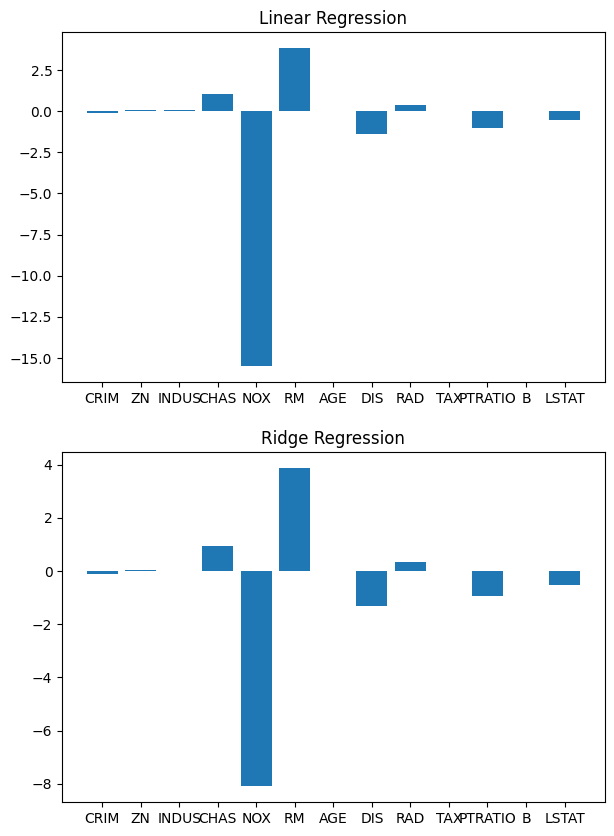

In [17]:
fig = plt.figure(figsize=(7,10))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 重回帰分析
ax1 = fig.add_subplot(2, 1, 1)
ax1.bar(x=left, height=model.coef_)
ax1.set_title('Linear Regression')

# Ridge回帰
ax2 = fig.add_subplot(2, 1, 2)
ax2.bar(x=left, height=ridge.coef_)
ax2.set_title('Ridge Regression')

In [18]:
print('train score : ', ridge.score(x_train, t_train))
print('test score : ', ridge.score(x_test, t_test))

train score :  0.7418204667553785
test score :  0.7130474091495267


あまり変わらない...

In [19]:
y2 = ridge.predict(x_test)
print('予測値:', y2[0])
print('目標値' ,t_test[0])

予測値: 17.631767614249785
目標値 19.5


#### 1.3 Lasso回帰

In [20]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1)
lasso.fit(x_train, t_train)
lasso.coef_

array([-0.07630786,  0.03677383, -0.        ,  0.        , -0.        ,
        1.08637139,  0.0166113 , -0.57995549,  0.28846684, -0.01776162,
       -0.75811455,  0.00608249, -0.74571252])

いくつか0になっている。

Text(0.5, 1.0, 'Lasso Regression')

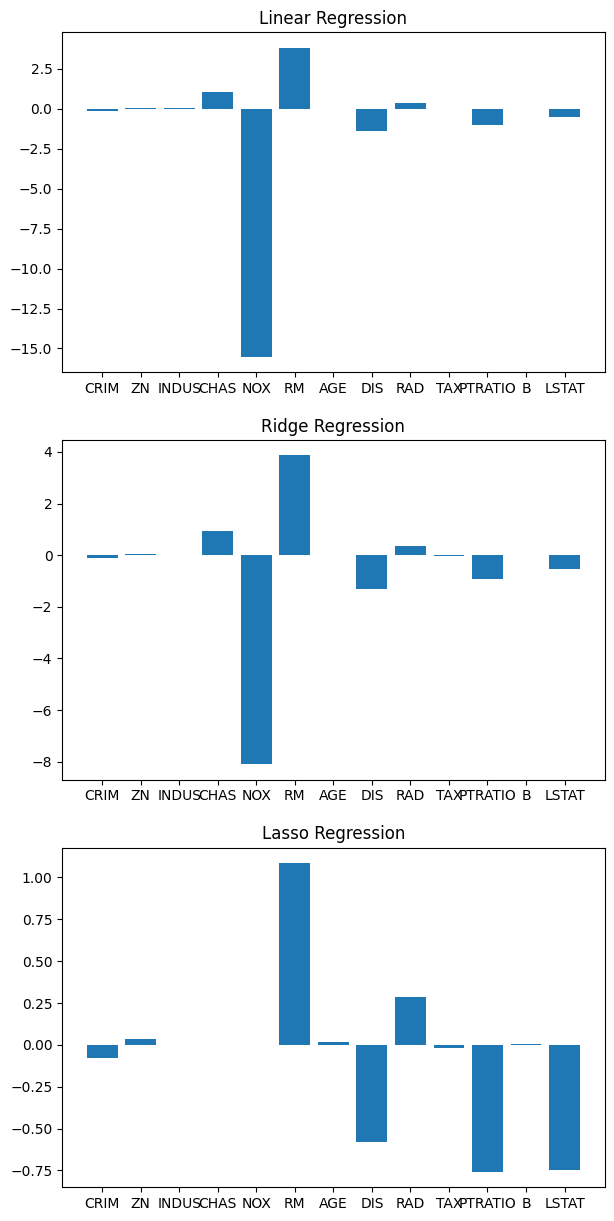

In [21]:
fig = plt.figure(figsize=(7,15))
left = np.array(['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# 重回帰分析
ax1 = fig.add_subplot(3, 1, 1)
ax1.bar(x=left, height=model.coef_)
ax1.set_title('Linear Regression')

# Ridge回帰
ax2 = fig.add_subplot(3, 1, 2)
ax2.bar(x=left, height=ridge.coef_)
ax2.set_title('Ridge Regression')

# lasso回帰
ax3 = fig.add_subplot(3, 1, 3)
ax3.bar(x=left, height=lasso.coef_)
ax3.set_title('Lasso Regression')

In [22]:
print('train score : ', lasso.score(x_train, t_train))
print('test score : ', lasso.score(x_test, t_test))
y3 = lasso.predict(x_test)
print('予測値:', y3[0])
print('目標値' ,t_test[0])

train score :  0.6933654137898017
test score :  0.656057743047451
予測値: 17.81247972558086
目標値 19.5


決定係数の値が全体的に小さくなったのでLasso回帰はよくなさそう。

### 相関関係と多重共線性問題

In [26]:
file_path = '/Users/takajikazuya/Documents/machine_learning/Regression/regression_pls.csv'
df = pd.read_csv(file_path)
df

,Target,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x187,x188,x189,x190,x191,x192,x193,x194,x195,x196
0,1.58,59.068,54.028,59.037114,24,0,0.213790,-0.369921,0.369921,0.213790,...,0,0,0,0,0,0,0,0,0,0
1,1.34,46.073,40.025,46.053098,20,0,-0.001725,-0.271722,0.271722,0.001725,...,0,0,0,0,0,0,0,0,0,0
2,1.22,60.052,56.020,60.021129,24,0,0.299685,-0.481433,0.481433,0.299685,...,0,0,0,0,0,0,0,0,0,0
3,1.15,71.123,62.051,71.073499,30,0,-0.004845,-0.316731,0.316731,0.004845,...,0,0,0,0,0,0,0,0,0,0
4,1.12,76.055,72.023,76.027277,30,0,0.335391,-0.349891,0.349891,0.335391,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1285,-8.65,360.882,356.850,357.844416,94,0,0.068622,-0.083604,0.083604,0.068622,...,0,0,0,0,0,0,0,0,0,0
1286,-8.66,278.354,264.242,278.109550,102,0,-0.009902,-0.061629,0.061629,0.009902,...,0,0,0,0,0,0,0,0,0,0
1287,-9.03,276.338,264.242,276.093900,100,0,-0.001409,-0.061011,0.061011,0.001409,...,0,0,0,0,0,0,0,0,0,0
1288,-10.26,464.217,463.209,459.727499,112,0,0.080892,-0.082630,0.082630,0.080892,...,0,0,0,0,0,0,0,0,0,0
